Create a Simple Image with white background using Pillow

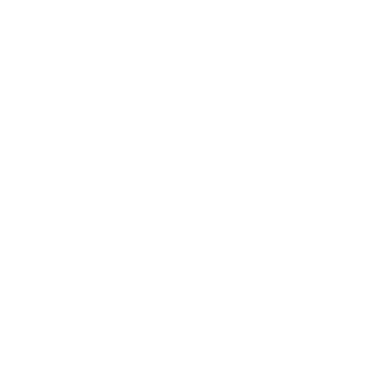

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the desired dimensions for your image
width = 51
height = 51

# Create a new grayscale image ('L' mode) with a WHITE background (color=255)
# If you used color=0, it would be black, and painting a black pixel wouldn't be visible.
white_background_img = Image.new('L', (width, height), color=255) # 255 for white in grayscale


# Display the modified image
plt.imshow(white_background_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # Hide axes for a cleaner look
plt.show()

# If you want to save the modified image:
# gray_background_img.save("white_grayscale_with_black_pixel.png")

Add a black dot to the center of the image

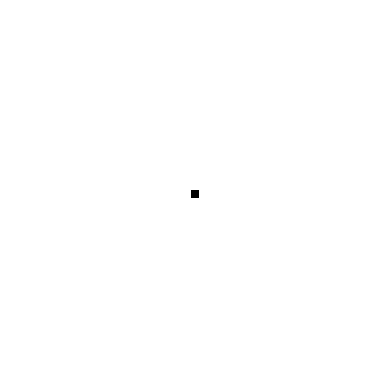

In [2]:
# --- Painting one pixel black on the grayscale image ---
pixels = white_background_img.load()

# Define the coordinates of the pixel you want to change
pixel_center_x = width // 2    # X-coordinate (e.g., center horizontally)
pixel_center_y = height // 2   # Y-coordinate (e.g., center vertically)

# Set the pixel at (pixel_x, pixel_y) to black (intensity 0)
pixels[pixel_center_x, pixel_center_y] = 0 # 0 for black in grayscale

# Display the modified image
plt.imshow(white_background_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # Hide axes for a cleaner look
plt.show()

Based on the above, create an image of a checkerboard

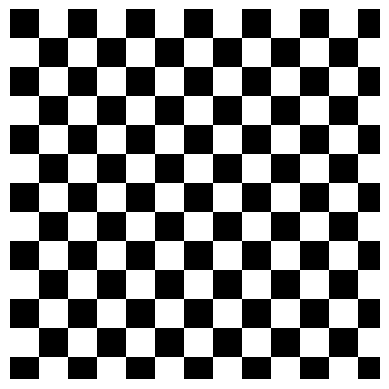

In [12]:
width = 51
height = 51
checker_board = Image.new('L', (width, height), color=255) # 255 for white in grayscale

# --- Image of a checkerboard ---
pixels = checker_board.load()

divisor = 4
# Change this to modify the size of squares

# Set the pixels at alternating rows and columns to black (intensity 0)
for i in range(height):
    for j in range(width):
        if (i // divisor + j // divisor) % 2 == 0:  # Change the size of squares by modifying the divisor
            pixels[i, j] = 0 # 0 for black in grayscale

# Display the modified image
plt.imshow(checker_board, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # Hide axes for a cleaner look
plt.show()

Based on the above, create an image of a heart using the following equations: ![heart.png](attachment:heart.png)

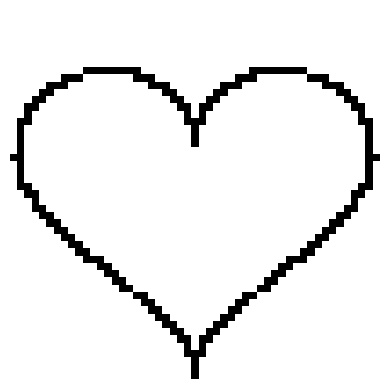

In [13]:
width = 51#2
height = 51#2
heart = Image.new('L', (width, height), color=255) # 255 for white in grayscale

# --- Image of a heart ---
pixels = heart.load()

t = np.linspace(-np.pi, np.pi, 1000)

x = 16 * np.sin(t)**3
y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)

x_max = np.max(np.abs(x))
y_max = np.max(np.abs(y))

# scale to image size
x = (width//2 * (x / x_max)).astype(int)
y = (height//2 * (y / y_max)).astype(int)

# draw corresponding points
for xi, yi in zip(x, y):
    pixels[xi + width//2, height//2 - yi] = 0

# Display the modified image
plt.imshow(heart, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # Hide axes for a cleaner look
plt.show()

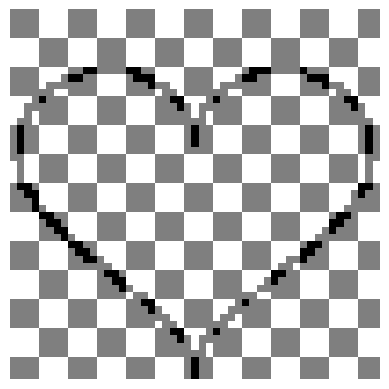

In [16]:
from PIL import ImageChops

board_plus_heart = Image.blend(checker_board, heart, alpha=0.5)# higher alpha makes checker board dominant

# Display the modified image
plt.imshow(board_plus_heart, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # Hide axes for a cleaner look
plt.show()